# BDA500 – Group Project 1 (Housing Price)

**Group #**: _5_  
**Project Title**: _Gold Price Prediction_  
**Members & Contributions**:
- Part A: _Khanh Linh Le_ — Data/Prep, EDA, Categorical Handling
- Part B: _Khanh Linh Le & Michelle Cong_ — Linear & Ridge, Metrics, Residuals
- Part C: _Michelle Cong_ — Tree Ensembles, K-Fold CV

> Add comments in your cells noting who authored them.


## “8 Steps” Mapping & Responsibility Table (fill in)

| Step | What you did (1–2 lines) | Member |
|---|---|---|
| 1. Frame the problem |Defined the goal as predicting the daily closing price of gold from historical data (2004–2025) |Khanh Linh Le |
| 2. Get the data |Collected historical gold price data (Date, Open, High, Low, Close, Volume) and loaded it into the notebook|Khanh Linh Le |
| 3. Explore/visualize |Explored trends over time and correlations among features; visualized long-term price movement and volatility.|Khanh Linh Le |
| 4. Prep (cats, custom, scale) |Converted date columns, created lag features (e.g., previous day’s close), and scaled numeric variables |Khanh Linh Le |
| 5.1. Pipelines |Split data into training/testing sets, trained Linear Regression and Ridge Regression | Khanh Linh Le |
| 5.2. Pipelines | split the dataset into training and test sets, then trained a Polynominal Regression model of degree 2 on the training data |  |
| 6. Train & validate | | |
| 7. Fine-tune | | |
| 8. Present & maintain | | |

| Topic/Task | What you did (1–2 lines) | Member |
|---|---|---|
| Coding tasks |Implemented end-to-end code for data loading, EDA, preprocessing, and model training |Khanh Linh Le |
| specific models |Linear & Ridge |Khanh Linh Le |
| specific models |Polynominal Regression, Decision Tree Regressor, RandomForest Regressor  | Michelle Cong|
| pipelines |built preprocessing and modeling piplines for data cleaning, feature scaling, and reproducible model evaluation |Michelle Cong |
| EDA |Conducted descriptive analysis and visualized trends in housing prices and features |Khanh Linh Le |
| feature engineering |Transformed categorical and numeric features |Khanh Linh Le |
| Report writing | | Michelle Cong|
| methods |preprocessing, modeling techniques, and evaluation |Michelle Cong |
| results |Reported and compared model performance (MAE, RMSE, R2) for all regression approaches |Michelle Cong |
| discussion |analyzed strenths and weaknesses of each model and explain why linear methods performed best |Michelle Cong |
| limitations |assumption constraints |Michelle Cong |
| Plots & visuals |Created visualizations for EDA and model comparison |Khanh Linh Le |
| EDA plots |Generated correlation heatmap, scatterplots, and price distribution plots | Khanh Linh Le |
| comparison bar chart |plot comparision of model evaluation metrics to highlight best performer |Michelle Cong |generate residual plots to assess model fit variance and error distribution
| residuals | | |


# A. Data/Prep, EDA, Categorical Handling
Done by Khanh Linh Le

# 1.Import & Data Preparation

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('XAU_1d_data.csv', sep=";")
df.head()

,Date,Open,High,Low,Close,Volume
0,2004.06.11 00:00,384.0,384.8,382.8,384.1,272
1,2004.06.14 00:00,384.3,385.8,381.8,382.8,1902
2,2004.06.15 00:00,382.8,388.8,381.1,388.6,1951
3,2004.06.16 00:00,387.1,389.8,382.6,383.8,2014
4,2004.06.17 00:00,383.6,389.3,383.0,387.6,1568


## 1.1. Check basic info

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5383 entries, 0 to 5382
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5383 non-null   object 
 1   Open    5383 non-null   float64
 2   High    5383 non-null   float64
 3   Low     5383 non-null   float64
 4   Close   5383 non-null   float64
 5   Volume  5383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 252.5+ KB


In [215]:
df.describe()

,Open,High,Low,Close,Volume
count,5383.000000,5383.000000,5383.000000,5383.000000,5383.000000
mean,1349.047527,1358.929985,1338.962915,1349.308716,77200.402006
std,546.379723,550.090189,542.754756,546.750642,64781.978096
min,382.800000,384.800000,381.100000,382.800000,2.000000
25%,1005.150000,1014.660000,995.055000,1005.480000,24707.000000
50%,1292.270000,1298.830000,1284.880000,1292.250000,71362.000000
75%,1722.205000,1733.455000,1707.860000,1722.595000,110960.000000
max,3843.360000,3844.910000,3842.410000,3843.800000,679039.000000


## 1.2. Handle missing values (if any)

In [216]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


## 1.3. Convert Date column to Datetime

In [217]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'], format='%Y.%m.%d %H:%M', errors='coerce')
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-06-11,384.0,384.8,382.8,384.1,272
1,2004-06-14,384.3,385.8,381.8,382.8,1902
2,2004-06-15,382.8,388.8,381.1,388.6,1951
3,2004-06-16,387.1,389.8,382.6,383.8,2014
4,2004-06-17,383.6,389.3,383.0,387.6,1568


# 2.Exploratory Data Analysis (EDA)

## 2.1. Overview

In [218]:
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Shape: (5383, 6)
Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']


## 2.2. EDA Plots

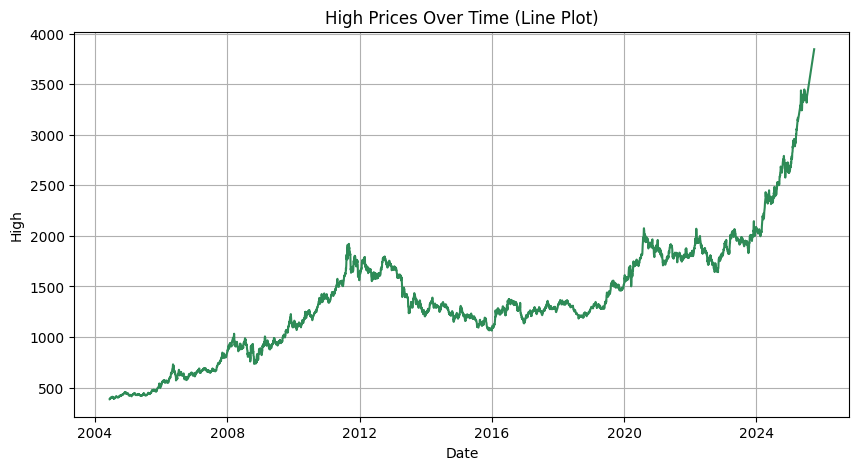

In [219]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['High'], color='seagreen')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('High Prices Over Time (Line Plot)')
plt.grid(True)
plt.show()


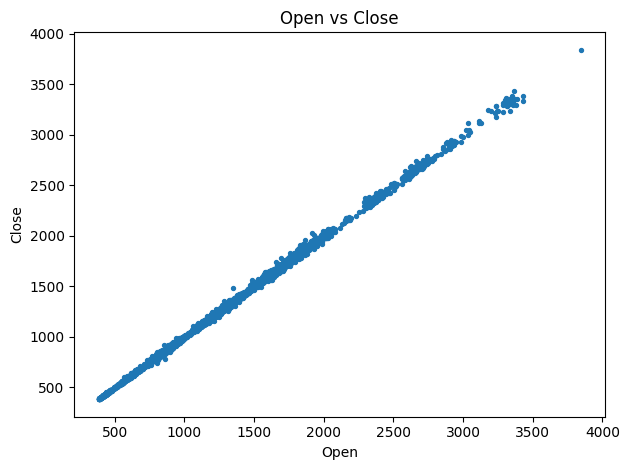

In [220]:
plt.figure()
plt.scatter(df['Close'], df['Open'], s=8)
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Open vs Close')
plt.tight_layout()
plt.show()

## 2.3. Histograms of numeric features


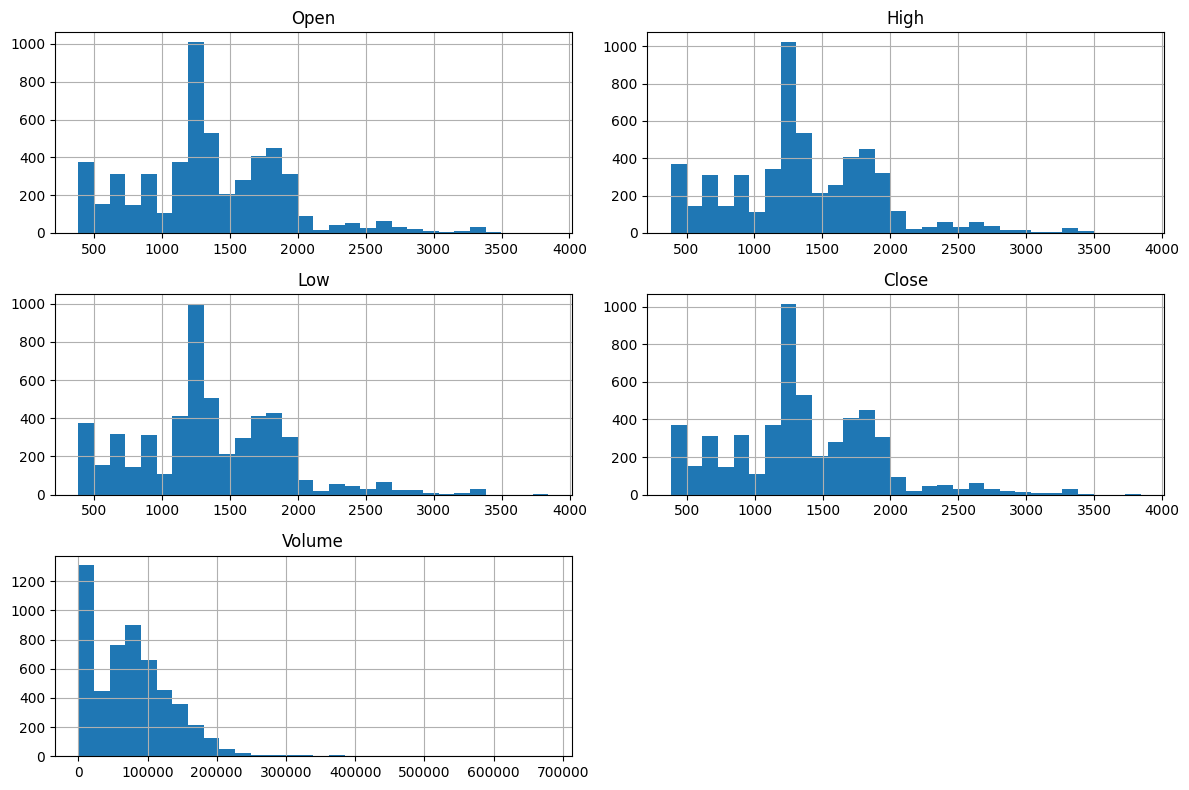

In [221]:
import numpy as np
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

## 2.4. Correlation between numeric features

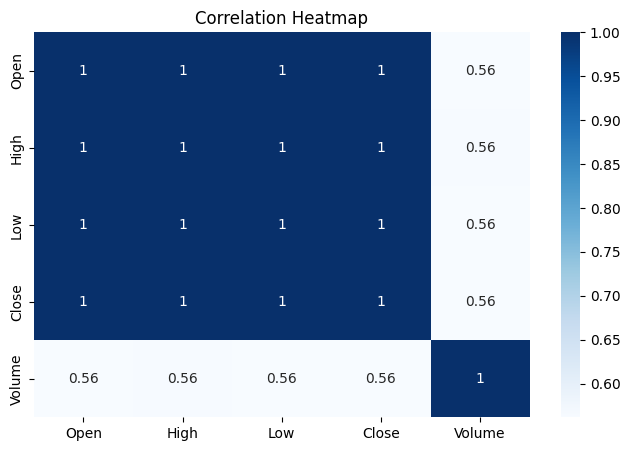

In [222]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


# 3.Categorical Handling

*   List item
*   List item



In [223]:

print("Features:")
print(df.columns)
print("Target: `Close`")
# Find numeric attributes
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", numeric_cols)

# Find categorical attributes
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Find datetime attributes
datetime_cols = df.select_dtypes(include=['datetime']).columns.tolist()
print("Datetime features:", datetime_cols)

Features:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
Target: `Close`
Numeric columns: ['Open', 'High', 'Low', 'Close', 'Volume']
Categorical columns: []
Datetime features: ['Date']


# B. Modeling

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1.Linear Regression Model

In [225]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics")
print(f"MAE:  {mae_lr:.4f}")
print(f"MSE:  {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R²:   {r2_lr:.4f}")


Linear Regression Metrics
MAE:  3.7261
MSE:  32.4818
RMSE: 5.6993
R²:   0.9999


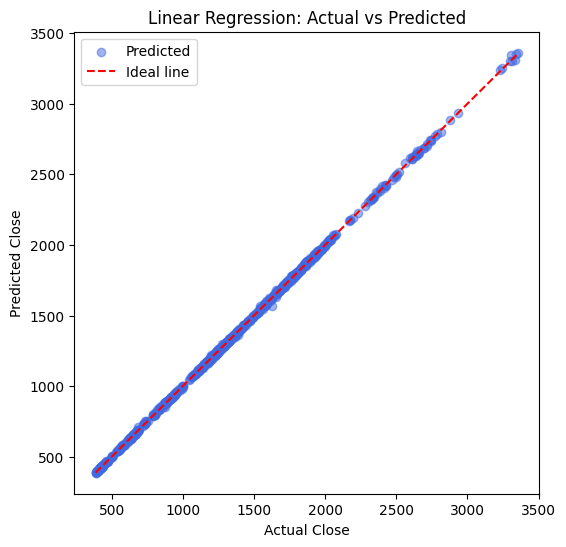

In [226]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='royalblue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal line')
plt.xlabel("Actual Close")
plt.ylabel("Predicted Close")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()


## 2.Ridge Regression Model

In [227]:
# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge.predict(X_test)

# Metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Metrics")
print(f"MAE:  {mae_ridge:.4f}")
print(f"MSE:  {mse_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"R²:   {r2_ridge:.4f}")


Ridge Regression Metrics
MAE:  3.7261
MSE:  32.4818
RMSE: 5.6993
R²:   0.9999


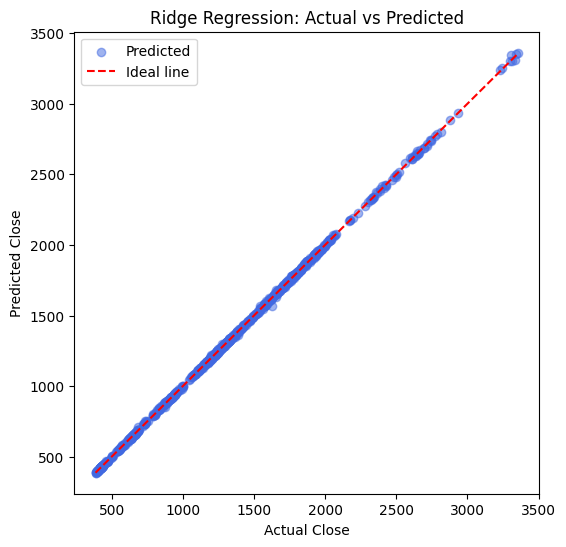

In [228]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='royalblue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal line')
plt.xlabel("Actual Close")
plt.ylabel("Predicted Close")
plt.title("Ridge Regression: Actual vs Predicted")
plt.legend()
plt.show()


## 3. Polynomial Regression (degree = 2)

3.1 Create degree=2 polynominal feature

In [229]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np

poly_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                      ('ridge', Ridge(alpha=0.1))])
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print('Polynomial degree=2 Regression Metrics')
print(f'MAE:  {mae_poly:.4f}')
print(f'RMSE: {rmse_poly:.4f}')
print(f'R²:   {r2_poly:.4f}')

Polynomial degree=2 Regression Metrics
MAE:  3.7365
RMSE: 5.8258
R²:   0.9999


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.00106e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


/tmp/ipython-input-2382167579.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


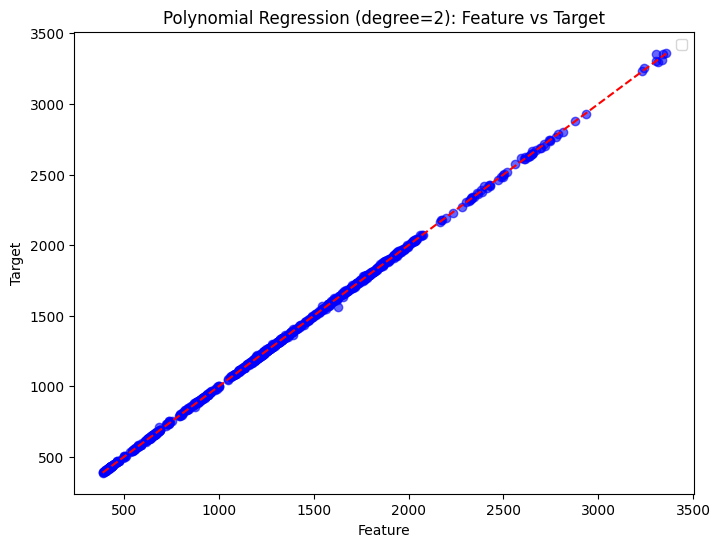

In [230]:
#Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_poly, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title("Polynomial Regression (degree=2): Feature vs Target")
plt.legend()
plt.show()

3.2 Residuals

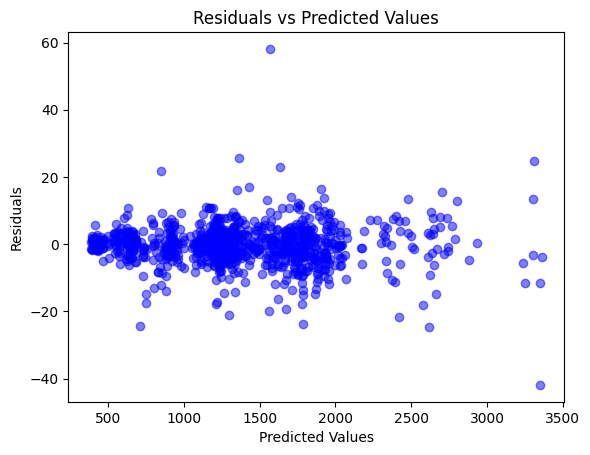

In [231]:
#Plot residuals for Linear/Ridge/Polynominal models
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals, alpha=0.5, color='blue', label='Linear')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

## Part C -

1. Decision Tree: K-Fold CV

In [232]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold

dt = DecisionTreeRegressor(random_state=42, max_depth=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse = cross_val_score(dt, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print('Decision Tree Regression Metrics')
print(f'CV RMSE: {-cv_rmse:.4f}')
print(f'MAE:    {mean_absolute_error(y_test, y_pred_dt):.4f}')
print(f'RMSE:   {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.4f}')
print(f'R²:     {r2_score(y_test, y_pred_dt):.4f}')

Decision Tree Regression Metrics
CV RMSE: 671.0956
MAE:    17.9593
RMSE:   23.9673
R²:     0.9981


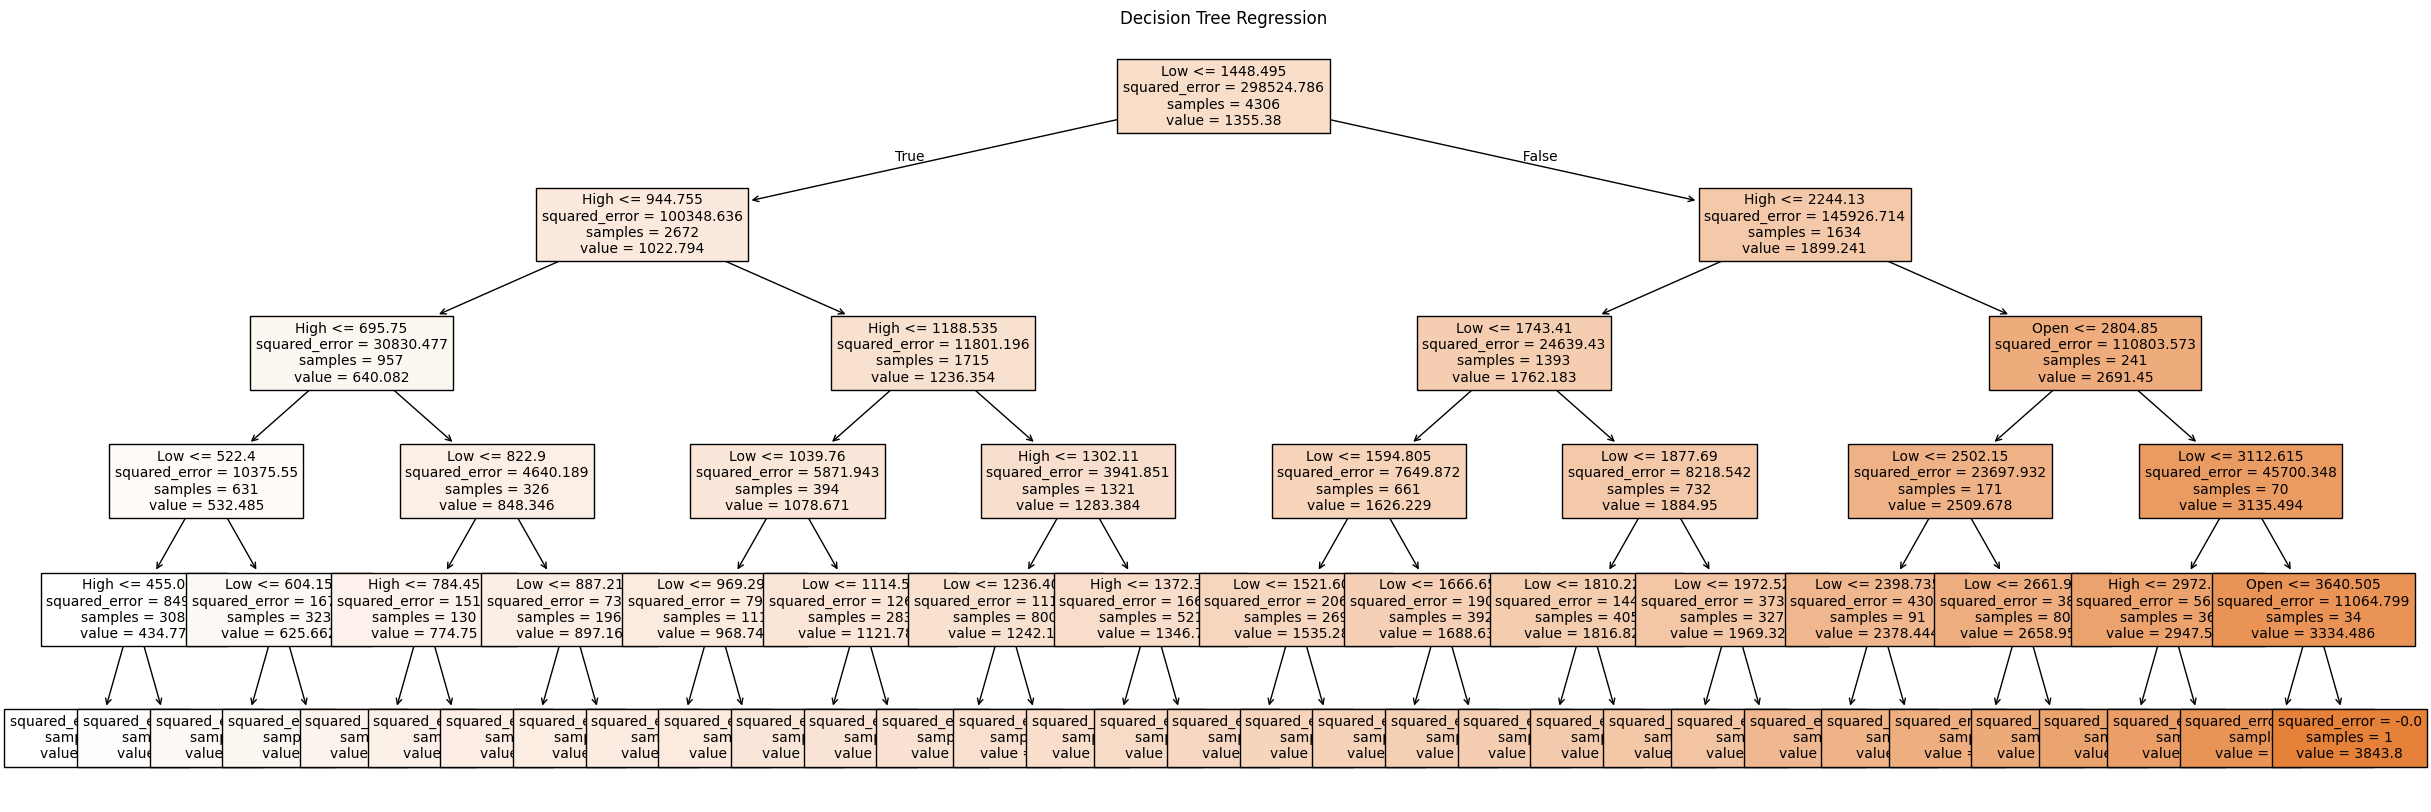

In [233]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
plot_tree(dt, filled=True, feature_names=X_train.columns, fontsize=10)
plt.title("Decision Tree Regression")
plt.show()


1.2 Predicted vs Actual Plot

/tmp/ipython-input-2986462957.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


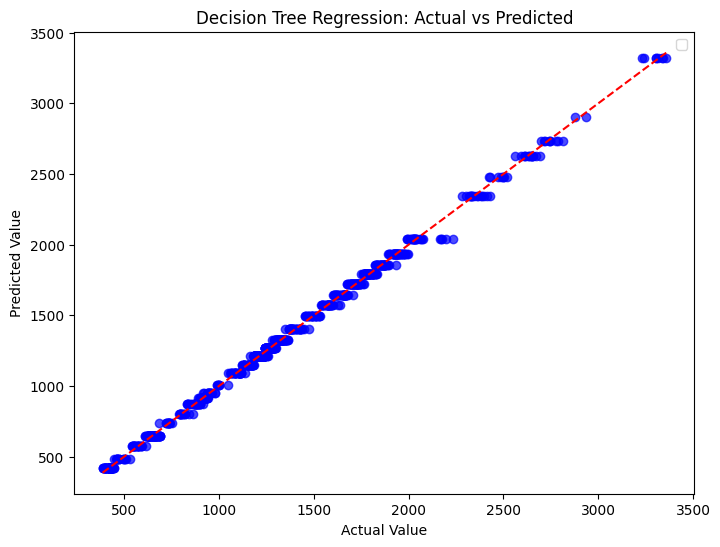

In [234]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dt, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.legend()
plt.show()

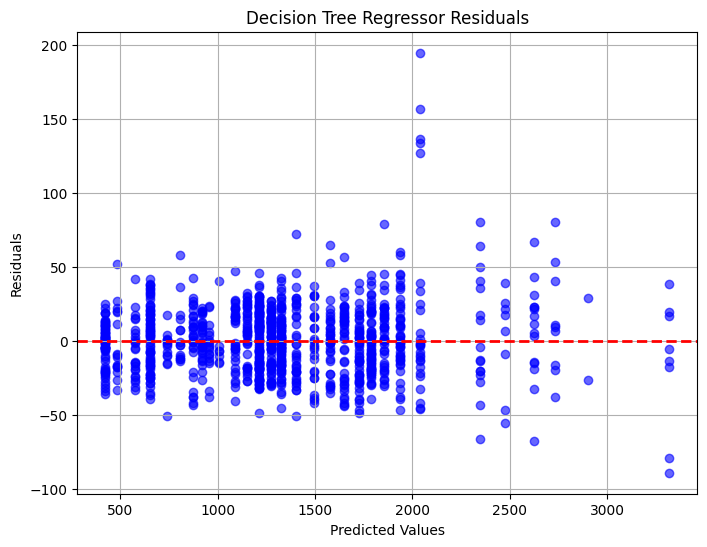

In [235]:
res_dt = y_test - y_pred_dt
plt.figure(figsize=(8,6))
plt.scatter(y_pred_dt, res_dt, alpha=0.6, color='blue')
plt.axhline(0, color='r', lw=2, linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Decision Tree Regressor Residuals')
plt.grid(True)
plt.show()


# 1.4 RandomForestRegressor

In [236]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize model
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Hyperparameter distribution
param_dist_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 0.8]}

random_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=5,   # only try 5 random combinations
    cv=kf,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=1,   # safer on laptop
    verbose=1
)

random_rf.fit(X_train, y_train)

best_rf = random_rf.best_estimator_
print('Best Random Forest parameters:', random_rf.best_params_)

# Evaluate on test set
y_pred_rf = best_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MAE: {mae_rf:.4f}')
print(f'RMSE: {rmse_rf:.4f}')
print(f'R²: {r2_rf:.4f}')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Random Forest parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.8, 'max_depth': 10}
MAE: 5.0311
RMSE: 7.4978
R²: 0.9998


plot predicted vs actual

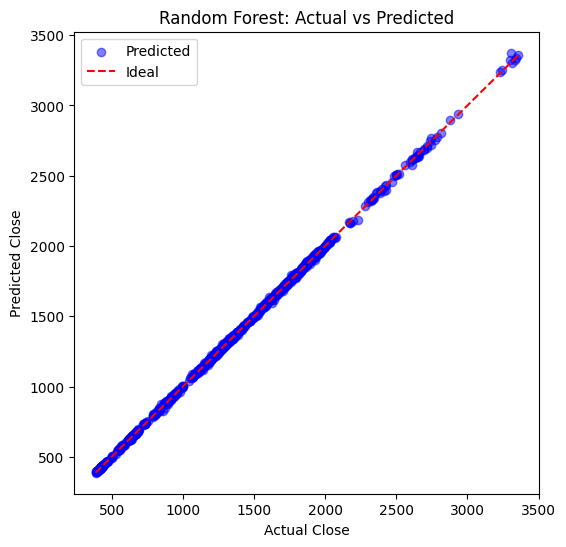

In [237]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Actual Close")
plt.ylabel("Predicted Close")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()
plt.show()

## 1.5 Model comparision

In [238]:
#Combine metrics for Linear, Ridge, Decision Tree, Random Forest
results = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_ridge, mae_dt, mae_rf],
    'RMSE': [rmse_lr, rmse_ridge, rmse_dt, rmse_rf],
    'R²': [r2_lr, r2_ridge, r2_dt, r2_rf]})

display(results)


,Model,MAE,RMSE,R²
0,Linear,3.726056,5.699283,0.999892
1,Ridge,3.726057,5.699281,0.999892
2,Decision Tree,5.896121,9.386801,0.999706
3,Random Forest,5.031080,7.497811,0.999812


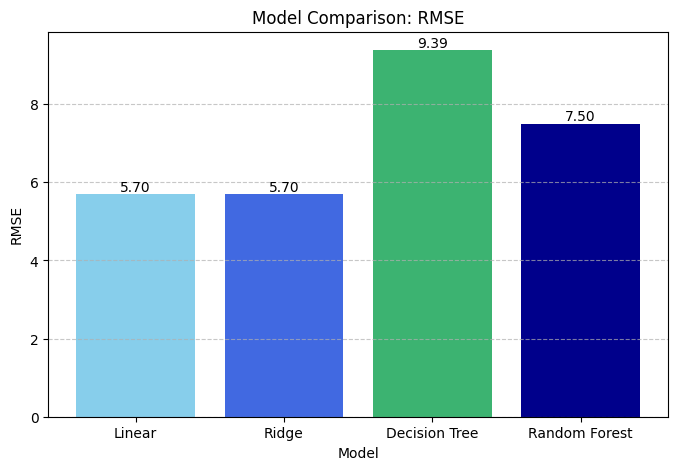

In [239]:
#Bar charts of RMSE
plt.figure(figsize=(8,5))
bars = plt.bar(results['Model'], results['RMSE'], color=['skyblue','royalblue','mediumseagreen','darkblue'])
plt.title('Model Comparison: RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate RMSE values above bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.2f}",
             ha='center', va='bottom', fontsize=10)

plt.show()